In [1]:
%matplotlib inline
from calendar import day_abbr
from datetime import datetime, timedelta
from pathlib import Path
from time import time
from tracemalloc import start
import ctd
from matplotlib import dates
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
import matplotlib.colors
import pandas as pd
from geopy import Point
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import gsw 

# suppress warnings
import warnings
warnings.filterwarnings("ignore")


# Set the path for the src directory for importing custom modules
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from functions import to_gsw
from paths import *
pd.options.plotting.backend = "matplotlib"

In [22]:

df_mooring = pd.read_csv(file_mooring_microcat, index_col=0, parse_dates=True)

df_mooring['Mean_pressure'] = df_mooring.groupby('depth').transform('mean')['Pressure [dbar]'].round(2)
df_mooring['date'] = df_mooring.date.astype('datetime64[m]')


In [23]:
df_mooring["depth"].sort_values().unique()
depths= [  5,  60, 150, 330, 540]
colors = ['cyan','royalblue',  'red','black', 'green']
cdepth = dict(zip(depths, colors))


In [24]:
df_mooring.date = df_mooring.date.astype('datetime64[m]')


In [25]:
#  import blended_transform_factory

def draw_box_around_subplot(fig, ax, xloc1, xloc2, yloc1, color, linewidth, linestyle='--'):
    '''
    draws a box around a subplot
    ax = axes object where to start drawing
    xloc1 = x location of the left vertical line, in data coordinates
    xloc2 = x location of the right vertical line, in data coordinates
    yloc1 = y location of the bottom horizontal line, in figure coordinates
    yloc2 = y location of the top horizontal line, in figure coordinates
    '''
    xline = [xloc1, xloc1, xloc2, xloc2, xloc1]
    yline = [yloc1[0], yloc1[1], yloc1[1], yloc1[0], yloc1[0]]
    trans = blended_transform_factory(ax.transData, fig.transFigure)
    ax.plot(xline, yline, transform=trans, clip_on=False, zorder=0, color=color, linewidth=linewidth, linestyle=linestyle)


In [35]:
df_mooring[df_mooring['depth'] == 540]

,Pressure [dbar],t090,c0S/m,time,sal,temp,sigma-dens,dens,flag,timedelta,date,depth,depSM,svCM,tv290C,cond0S/m,scan,Mean_pressure
214665,537.219,NaN,NaN,149.708345,33.5888,1.8069,26.8555,1029.3763,False,149 days 17:00:01.008000,2018-05-30 17:00:00,540,NaN,1464.30,1.8355,2.975143,1.0,538.83
214666,537.302,NaN,NaN,149.715289,33.5945,1.8081,26.8600,1029.3812,False,149 days 17:10:00.969600,2018-05-30 17:10:00,540,NaN,1464.31,1.8367,2.975706,2.0,538.83
214667,537.392,NaN,NaN,149.722234,33.5946,1.8083,26.8601,1029.3817,False,149 days 17:20:01.017600,2018-05-30 17:20:00,540,NaN,1464.31,1.8370,2.975742,3.0,538.83
214668,537.508,NaN,NaN,149.729178,33.5949,1.8087,26.8603,1029.3824,False,149 days 17:30:00.979200,2018-05-30 17:30:00,540,NaN,1464.32,1.8373,2.975795,4.0,538.83
214669,537.625,NaN,NaN,149.736123,33.5963,1.8111,26.8613,1029.3839,False,149 days 17:40:01.027200,2018-05-30 17:40:00,540,NaN,1464.33,1.8398,2.976127,5.0,538.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269212,537.172,NaN,NaN,528.506956,33.4617,1.0128,26.8077,1029.3411,False,528 days 12:10:00.998400,2019-06-13 12:10:00,540,NaN,1460.57,1.0378,2.897937,54548.0,538.83
269213,537.188,NaN,NaN,528.513900,33.4623,1.0124,26.8082,1029.3417,False,528 days 12:20:00.960000,2019-06-13 12:20:00,540,NaN,1460.57,1.0373,2.897948,54549.0,538.83
269214,537.208,NaN,NaN,528.520845,33.4618,1.0133,26.8077,1029.3413,False,528 days 12:30:01.008000,2019-06-13 12:30:00,540,NaN,1460.57,1.0382,2.897984,54550.0,538.83
269215,537.245,NaN,NaN,528.527789,33.4617,1.0135,26.8077,1029.3415,False,528 days 12:40:00.969600,2019-06-13 12:40:00,540,NaN,1460.57,1.0385,2.898001,54551.0,538.83


538.8324092608887
540 2018-07-01 2018-10-01
540 2018-12-01 2019-04-01
331.24443521777386
330 2018-07-01 2018-10-01
330 2018-12-01 2019-04-01
skip


[Text(17683.0, 0, 'Jun'),
 Text(17713.0, 0, 'Jul'),
 Text(17744.0, 0, 'Aug'),
 Text(17775.0, 0, 'Sep'),
 Text(17805.0, 0, 'Oct'),
 Text(17836.0, 0, 'Nov'),
 Text(17866.0, 0, 'Dec'),
 Text(17897.0, 0, 'Jan\n2019'),
 Text(17928.0, 0, 'Feb'),
 Text(17956.0, 0, 'Mar'),
 Text(17987.0, 0, 'Apr'),
 Text(18017.0, 0, 'May'),
 Text(18048.0, 0, 'Jun')]

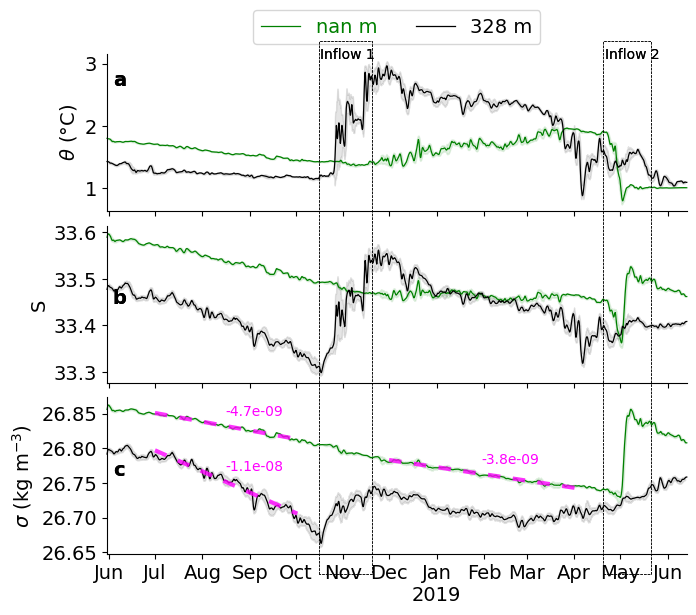

In [30]:

cdepth = dict(zip(depths, ['cyan','royalblue',  'red','black', 'green']))

plt.rcParams.update({'font.size': 14})
linewidth = 0.9

alpha = 0.3
mm = cm/10.  # millimeters in inches
figsize=(190*mm, 165*mm)   # AGU full size is 190 mm x 230 mm


axvar = dict(zip (['temp',  'sigma-dens', 'sal'], [0,2,1]))
fig, ax = plt.subplots(figsize=figsize, nrows=3, ncols=1, sharey=False, sharex=True)

for d in [540,330]:
    axTEMP = ax[axvar['temp']]
    axDENS = ax[axvar['sigma-dens']]
    df_depth = df_mooring[df_mooring["depth"]==d]
    mean_real_depth = df_depth["depSM"].mean()
    print(df_depth["Pressure [dbar]"].mean())

    for i, var in enumerate(['sigma-dens',  'temp',]):
        data = df_depth[var]
        y = butter_lowpass_filter(data, cutoff, fs, order=2)
        # fill between std

        axx = ax[axvar[var]]
        axx.fill_between(df_depth.date, data.rolling(window=int(fs/cutoff), center=True).mean()-data.rolling(window=int(fs/cutoff), center=True).std(), data.rolling(window=int(fs/cutoff), center=True).mean()+data.rolling(window=int(fs/cutoff), center=True).std(), alpha=0.1, color=cdepth[d], zorder=1)
        axx.plot(df_depth.date, y, label=f"{mean_real_depth:.0f} m", color=cdepth[d], linewidth=linewidth, zorder=2, clip_on=False)

    var = 'sal'
    axSAL = ax[axvar['sal']]
    axSAL.set_ylabel("S")#, loc='bottom')
    axSAL.yaxis.set_minor_locator( matplotlib.ticker.MultipleLocator(0.25) )
    axx = ax[axvar[var]]
    data = df_depth[var]
    y = butter_lowpass_filter(data, cutoff, fs, order=2)
    axx.fill_between(df_depth.date, data.rolling(window=int(fs/cutoff), center=True).mean()-data.rolling(window=int(fs/cutoff), center=True).std(), data.rolling(window=int(fs/cutoff), center=True).mean()+data.rolling(window=int(fs/cutoff), center=True).std(), alpha=0.1, color=cdepth[d], zorder=1)
    axx.plot(df_depth.date, y, label=f"{mean_real_depth:.0f} m", color=cdepth[d], linewidth=linewidth, zorder=2, clip_on=False)


    ax[-1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax[-1].xaxis.set_minor_locator(mdates.MonthLocator())
    axDENS.set_ylabel(r"$\sigma$ (kg m$^{-3}$)", )
    axDENS.yaxis.set_major_locator( matplotlib.ticker.MultipleLocator(0.05) )
    axTEMP.set_ylabel(r"$\theta$ (°C)")
    axDENS.set_xlim(df_depth.date.min(), df_depth.date.max())
    # add horizontal legend above the plot
    ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4,labelcolor='linecolor',)

    alphabet = ['a', 'b', 'c',]
    adjusted_alphabet = ['a','b', 'c',]
    for i, label in enumerate(adjusted_alphabet[:len(ax)]):
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].get_yaxis().get_major_formatter().set_useOffset(False) 
        if (ax[i] == axSAL) or (ax[i] == axDENS):
            ax[i].text(0.01, 0.5, label, transform=ax[i].transAxes, fontsize=14, fontweight='bold')
        else:
            ax[i].text(0.01, 0.8, label, transform=ax[i].transAxes, fontsize=14, fontweight='bold')
    plt.subplots_adjust(hspace=0.09)

    yloc = [0.08, 0.9]
    boxes = [['October 16, 2018', 'Nov 20, 18'], ['April 20, 19', 'May 21, 19']]
    for xlocs in boxes:
        xlocs = pd.to_datetime(xlocs)
    ax[-1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[-1].xaxis.set_major_formatter(mdates.ConciseDateFormatter('%b'))
    for axx in ax:
        axx.patch.set_facecolor('none')

    colors = ['black', 'black', 'black', 'black']
    for j,xlocs in enumerate(boxes):
        xlocs = pd.to_datetime(xlocs)
        for i in range(len(xlocs) - 1):
            draw_box_around_subplot(fig, ax[-1], xlocs[i], xlocs[i + 1], yloc1=yloc,color=colors[j], linewidth=0.5)
        ax[0].text(xlocs[0]+pd.to_timedelta(1, 'days'), 0.95, f'Inflow {(j+1):d}', transform=blended_transform_factory(ax[0].transData, ax[0].transAxes),  ha='left', va='bottom', color=colors[j], fontsize=10)



    # add linear trend
    TrendStarts = ['2018-07-01', '2018-12-01']
    TrendEnds = ['2018-10-01', '2019-04-01']
    # for depth in [330, 540]:
    depth = d
    for TrendStart, TrendEnd in zip(TrendStarts, TrendEnds):
        print(depth, TrendStart, TrendEnd)
        if depth ==330 and TrendStart == '2018-12-01':
            print("skip")
        else:
            dfDensTrend = df_mooring[df_mooring.depth==depth].set_index("date")[TrendStart:TrendEnd].reset_index()
            x = dfDensTrend["time"]
            y = dfDensTrend["sigma-dens"]
            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            ax[axvar['sigma-dens']].plot(dfDensTrend["date"], intercept + slope*x,  color = 'magenta', linewidth=3, zorder=3, linestyle = (0, (3, 3)), alpha=0.8)

            xloc_text = datetime.strptime(TrendStart, '%Y-%m-%d') + (datetime.strptime(TrendEnd, '%Y-%m-%d')-datetime.strptime(TrendStart, '%Y-%m-%d'))/2
            start_date = datetime.strptime('2018-01-01', '%Y-%m-%d')
            xloc_text_days = (xloc_text - start_date).days
            yloc_text = intercept + slope*xloc_text_days   +0.015     
            ax[axvar['sigma-dens']].text(xloc_text, yloc_text, f'{slope/86400:.1e}', color='magenta', fontsize=10)



dates = pd.date_range(start=df_depth.date.min(), end =df_depth.date.max(), freq='MS').to_pydatetime().tolist()
ax[-1].set_xticklabels([date.strftime('%b\n%Y') if date.month == 1 else date.strftime('%b') for i, date in enumerate(dates)])